In [40]:
%load_ext autoreload
%autoreload 2
from model import *
from tqdm import tqdm, trange

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Influence of `population_size`

### **Function** $x^2 + y^2 + 2z^2$

In [71]:
population_sizes = [10*i for i in range(1, 21)]
generations = 40
scope = [-10, 10]

pset_basic = PopulationSet()
for population_size in population_sizes:
    population = Population(population_size, BasicFunction(), scope, label=f"size = {population_size}")
    population.evolve(generations=generations, desc=f"size {population_size}", bar_stay=population_size==population_sizes[-1])
    pset_basic.add(population)

size 200: 100%|████████████████████████████████| 40/40 [00:09<00:00,  4.33gen/s]


#### **Model performance in relation to population size**

Generally, model performs better with bigger population, however, increasing the size beyond 60 brings diminishing returns.

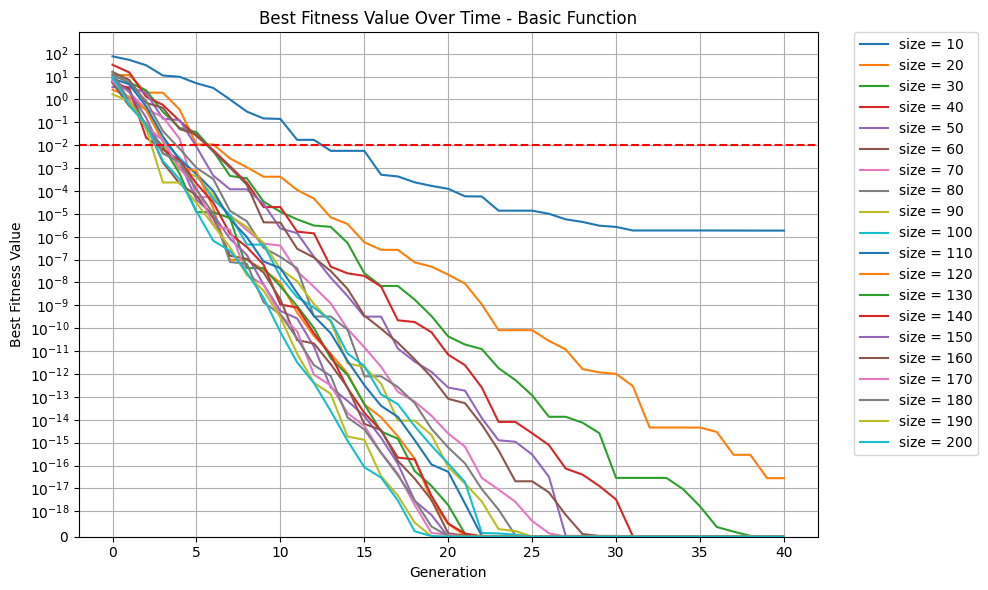

In [72]:
pset_basic.plot_best_values(title="Basic Function", log_scale=True, plot_precision=1e-18)

### **Rastrigin Function** with 5 dimensions

In [53]:
population_sizes = [10*i for i in range(1, 11)]
generations = 80
scope = [-10, 10]

pset_rastrigin = PopulationSet()
for population_size in population_sizes:
    population = Population(population_size, RastriginFunction(dim=5), scope, label=f"size = {population_size}")
    population.evolve(generations=generations, desc=f"size {population_size}", bar_stay=population_size==population_sizes[-1])
    pset_rastrigin.add(population)

size 100: 100%|████████████████████████████████| 80/80 [00:08<00:00,  9.56gen/s]


#### **Model performance in relation to population size**

Model struggled to solve for Rastrigin function with smaller population sizes (10-30). It is a result of getting stuck in local minima.

Anything over 30 seems to work well. The correlation between increasing population size beyond 40 and model performence is insignificant.

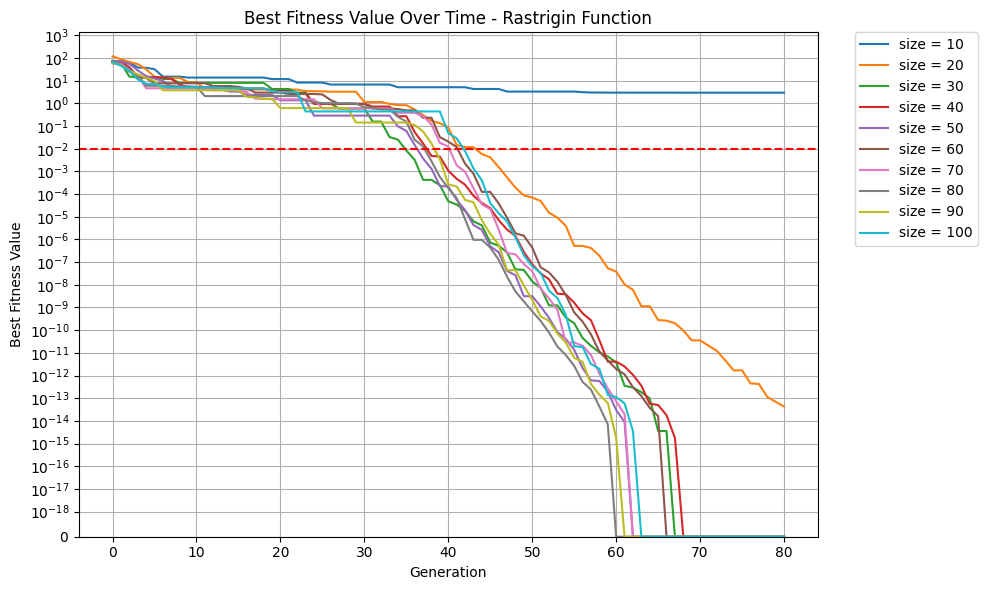

In [55]:
pset_rastrigin.plot_best_values(title="Rastrigin Function", log_scale=True, plot_precision=1e-18)

#### **Magic threshold**

$10^0 = 1$ seems to be the magic threshold value. Achieving this value accelerates model's progress - it is a result of function's behaviour

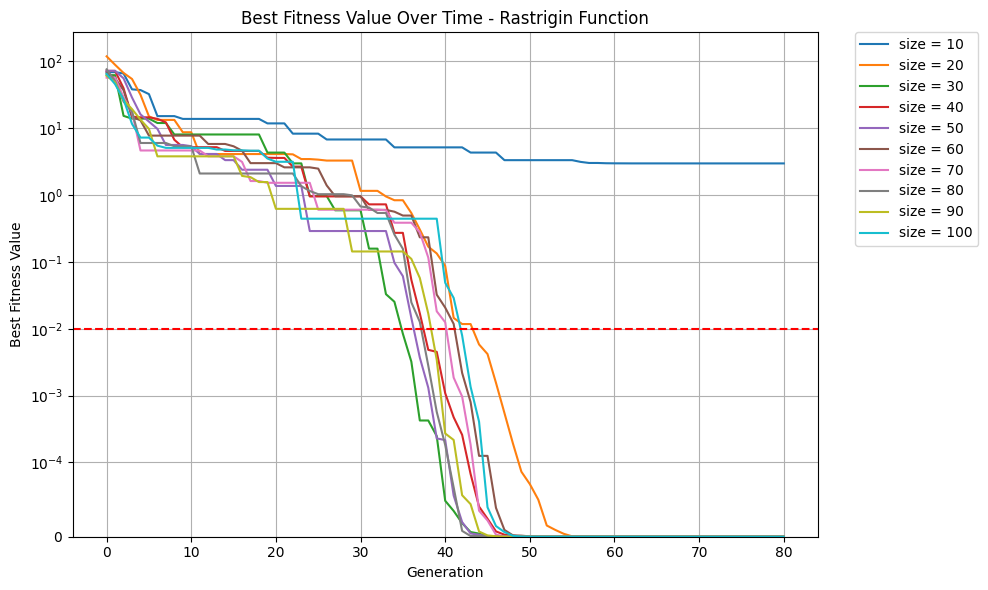

In [56]:
pset_rastrigin.plot_best_values(title="Rastrigin Function", log_scale=True, plot_precision=1e-4)

In [ ]:
# Influence of '

In [69]:
population_size = 40
generations = 200
scope = [-10, 10]
parent_densities = [i/10 for i in range(1, 11)]

pset_parentdensity = PopulationSet()
for parent_density in parent_densities:
    population = Population(population_size, BasicFunction(), scope, label=f"parent density = {parent_density}")
    population.evolve(generations=generations, desc=f"density {parent_density}", bar_stay=parent_density==1, parent_density=parent_density)
    pset_parentdensity.add(population)

density 1.0: 100%|███████████████████████████| 200/200 [00:04<00:00, 42.30gen/s]


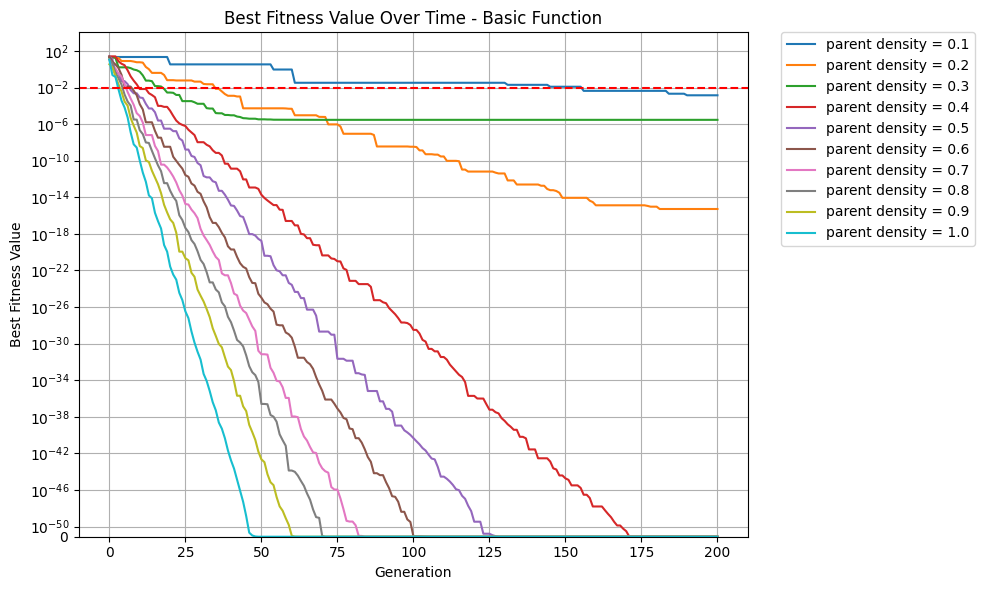

In [70]:
pset_parentdensity.plot_best_values(title="Basic Function", log_scale=True)